# SIMULADOR DE ESTRUTURAS COM TRELIÇAS PLANAS

#### Grupo:
* Andresa Buchala do Campos Bicudo 
* Beatriz Cabral Fernandes 
* Leonardo Duarte Malta de Abreu 

## Introdução 

## Estrutura do Código 

#### Imports das funções importantes

In [1]:
# Imports das Funções
from funcoesTermosol import *
from funcoes_aps3 import *
import pandas as pd

#### Importando dados do arquivo de entrada 

In [2]:
#importando os dados
[nn,N,nm,Inc,nc,F,nr,R] = importa('entrada-aps4.xlsx')

#Modulo de elasticidade
E = Inc[0,2]

#Area secao transversal
A = Inc[0,3]

print(f"""O módulo de elasticidade das treliças é: {E} kPa. A área de seção trnavesal dessas treliças é {A} m2""")

O módulo de elasticidade das treliças é: 4000000000.0 kPa. A área de seção trnavesal dessas treliças é 0.18 m2


#### Plotando o esquema do arquivo de entrada
![Screenshot](fotos/diagrama.png)

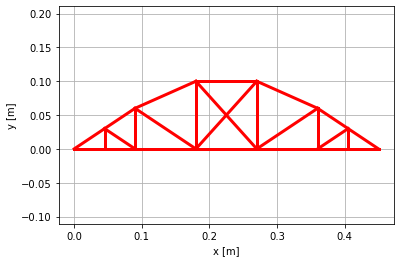

In [3]:
plota(N,Inc)

#### Criando matriz de conectividade

In [4]:
# Calculando matriz de conectividade
C = conectividade(Inc, nn, nm)
C

array([[ 0., -1.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -1.,  0., -1., -1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -1.,  0., -1.,  0.,
         0., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        -1.,  1.,  0., -1.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., -1.,  1.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

#### Calculando a Matriz dos Membros 

In [5]:
# Calcula matriz dos membros
M = membros(N,C)
M

array([[ 0.045,  0.045,  0.   ,  0.045,  0.045, -0.045,  0.045,  0.   ,
         0.09 ,  0.   ,  0.09 , -0.09 ,  0.09 ,  0.   ,  0.09 ,  0.09 ,
        -0.09 ,  0.09 ,  0.   ,  0.09 ,  0.09 ,  0.045,  0.   ,  0.045,
         0.045, -0.045],
       [ 0.03 ,  0.03 ,  0.03 ,  0.   ,  0.   ,  0.03 ,  0.03 ,  0.06 ,
         0.   ,  0.1  ,  0.04 ,  0.06 ,  0.   ,  0.1  ,  0.   ,  0.1  ,
         0.1  , -0.04 ,  0.06 ,  0.   ,  0.06 , -0.03 ,  0.03 ,  0.   ,
         0.   ,  0.03 ]])

#### Calculando a Matriz de comprimento para cada elemento

In [6]:
# Calcula o comprimento de cada elemento
l = calcula_l(M)
l

array([[0.05408327],
       [0.05408327],
       [0.03      ],
       [0.045     ],
       [0.045     ],
       [0.05408327],
       [0.05408327],
       [0.06      ],
       [0.09      ],
       [0.1       ],
       [0.09848858],
       [0.10816654],
       [0.09      ],
       [0.1       ],
       [0.09      ],
       [0.13453624],
       [0.13453624],
       [0.09848858],
       [0.06      ],
       [0.09      ],
       [0.10816654],
       [0.05408327],
       [0.03      ],
       [0.045     ],
       [0.045     ],
       [0.05408327]])

#### Calculando a Matriz trigonométrica

In [7]:
# Calcula matriz dos senos e cossenos
trig = calcula_trig(N,M,l)
trig

array([[-0.83205029, -0.5547002 ,  0.83205029,  0.5547002 ],
       [-0.83205029, -0.5547002 ,  0.83205029,  0.5547002 ],
       [-0.        , -1.        ,  0.        ,  1.        ],
       [-1.        , -0.        ,  1.        ,  0.        ],
       [-1.        , -0.        ,  1.        ,  0.        ],
       [ 0.83205029, -0.5547002 , -0.83205029,  0.5547002 ],
       [-0.83205029, -0.5547002 ,  0.83205029,  0.5547002 ],
       [-0.        , -1.        ,  0.        ,  1.        ],
       [-1.        , -0.        ,  1.        ,  0.        ],
       [-0.        , -1.        ,  0.        ,  1.        ],
       [-0.91381155, -0.40613847,  0.91381155,  0.40613847],
       [ 0.83205029, -0.5547002 , -0.83205029,  0.5547002 ],
       [-1.        , -0.        ,  1.        ,  0.        ],
       [-0.        , -1.        ,  0.        ,  1.        ],
       [-1.        , -0.        ,  1.        ,  0.        ],
       [-0.66896473, -0.74329415,  0.66896473,  0.74329415],
       [ 0.66896473, -0.

#### Calculando Matriz de Rigidez Sem condições de Contorno

In [8]:
#Calcula matriz de rigidez global e de cada elemento
Kg,Ke = calcula_Ke(C,M,E,A,nn)
Kg

array([[ 2.52165571e+10,  6.14437140e+09, -1.60000000e+10,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -9.21655711e+09, -6.14437140e+09,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.14437140e+09,  4.09624760e+09,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -6.14437140e+09, -4.09624760e+09,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00

#### Criando Matriz de Rigidez com as Condições de Contorno Aplicadas 

In [9]:
# Matriz de rigidez global com condicoes de contorno aplicadas
Kg_cc = aplica_cc(Kg,R)
Kg_cc

array([[ 3.32165571e+10, -6.14437140e+09, -8.00000000e+09,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -9.21655711e+09,
         6.14437140e+09,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-6.14437140e+09,  1.60962476e+10,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  6.14437140e+09,
        -4.09624760e+09,  0.00000000e+00, -1.20000000e+10,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-8.00000000e+09,  0.00000000e+00,  2.30032462e+10,
        -4.11110527e+08, -8.00000000e+09,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -4.6

#### Criando Vetor de Forças com as Confições de Contorno Aplicadas 

In [10]:
# Vetor de Forcas com condicoes de contorno
F_cc = aplica_cc(F,R)
F_cc

array([[   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [-750.],
       [   0.],
       [-750.],
       [   0.],
       [   0.],
       [   0.],
       [   0.]])

#### Calculando os Deslocamentos Pelo Método de Jacobi 

In [11]:
# Calcula deslocamentos
u = calcula_jacobi(Kg_cc, F_cc, 1e-5)
u

C:\Users\user\Documents\Insper\5-semestre\Transmecsol\aps3-transmecsol\funcoes_aps3.py:98: RuntimeWarning: invalid value encountered in true_divide
  err = max(abs((xnew-x)/xnew))


array([[-0.0107004 ],
       [ 0.02964903],
       [ 0.00742228],
       [-0.0051301 ],
       [-0.00742228],
       [-0.0051301 ],
       [ 0.0107004 ],
       [ 0.02964903],
       [ 0.02342403],
       [ 0.00596513],
       [-0.02765331],
       [-0.03164733],
       [ 0.02248806],
       [ 0.01090556],
       [-0.02248806],
       [ 0.01090556],
       [ 0.02765331],
       [-0.03164733],
       [-0.02342403],
       [ 0.00596513]])

#### Completando a Matriz de deslocamentos 

![Screenshot](fotos/diagrama.png)

In [12]:
# Matriz de deslocamentos completa (sem condicoes de contorno)
u_comp = calcula_u_comp(u,R)
nos = []
deslocamentos_x = []
deslocamentos_y = []
for i in range(len(u_comp)):
    if i%2 == 0:
        deslocamentos_x.append(u_comp[i])
        nos.append(int(i/2+1))
    else:
        deslocamentos_y.append(u_comp[i])
        
deslocamentos_nodais = pd.DataFrame()
deslocamentos_nodais['Nodes'] = nos
deslocamentos_nodais['Displacement in X'] = deslocamentos_x
deslocamentos_nodais['Displacement in Y'] = deslocamentos_y

deslocamentos_nodais

,Nodes,Displacement in X,Displacement in Y
0,1,[0.0],[0.0]
1,2,[0.0],[0.0]
2,3,[-0.01070039868379409],[0.029649034349627346]
3,4,[0.007422277332355498],[-0.005130104476116978]
4,5,[-0.007422277332355477],[-0.005130104476116943]
5,6,[0.01070039868379403],[0.029649034349627186]
6,7,[0.0],[0.0]
7,8,[0.0],[0.0]
8,9,[0.02342403310225436],[0.005965125960332244]
9,10,[-0.027653308587262664],[-0.03164733051143298]


#### Calculando Reações de Apoio as Deformações, Tensões e Forças Internas

In [14]:
#Calcula as reacoes de apoio
r_apoio = calcula_r_apoio(Kg, u_comp, R)
r_apoio

array([[-2.52540888e+08],
       [-1.68360592e+08],
       [ 1.71206379e+08],
       [-1.43163023e+08],
       [-1.71206379e+08],
       [-1.43163023e+08],
       [ 2.52540888e+08],
       [-1.68360592e+08]])

In [15]:
# Calcula deformacoes
d = calcula_deformacao(Inc,u_comp,l,R,trig)
#Calcula tensoes
t = calcula_tensao(E,d)
F_interno = A*t 


df_informacoes = pd.DataFrame()
elementos = []
for i in range(nm):
    elementos.append(i+1)

df_informacoes['Element'] = elementos
df_informacoes['Deformation'] = d
df_informacoes['Tensile Force'] = F_interno
df_informacoes['Longitudinal Stress'] = t
df_informacoes

,Element,Deformation,Tensile Force,Longitudinal Stress
0,1,-0.767903,-5.528903e+08,-3.071613e+09
1,2,0.421551,3.035164e+08,1.686202e+09
2,3,0.198838,1.431630e+08,7.953501e+08
3,4,0.000000,0.000000e+00,0.000000e+00
4,5,-0.237787,-1.712064e+08,-9.511465e+08
5,6,-0.767903,-5.528903e+08,-3.071613e+09
6,7,-1.171574,-8.435333e+08,-4.686296e+09
7,8,-1.021606,-7.355564e+08,-4.086424e+09
8,9,0.201363,1.449814e+08,8.054523e+08
9,10,0.160357,1.154568e+08,6.414264e+08


#### Plotando gráfico com a deformação do problema (Ampliado em 1000 vezes)

#### Gerando Saída txt com informações relevantes

In [16]:
geraSaida("saida-final", r_apoio, u_comp, d, F_interno, t)

## Conclusão 

## Referências 